<a href="https://colab.research.google.com/github/zeyadahmedh/Exoplanets-Detection-Using-Machine-Learning/blob/main/Kepler_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Project Title

Brief description of the project, goals, and context.

## 📦 Imports & Configurations
Import libraries and set global options.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 📂 Data Loading


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Kepler.csv')
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,8/16/2018,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,8/16/2018,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,8/16/2018,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,8/16/2018,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,8/16/2018,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


## ⚙️ Feature Engineering
Create new features, transform data.

In [3]:
selected_columns = [
    # --- Physical Parameters ---
    "koi_prad", "koi_prad_err1", "koi_prad_err2",
    "koi_ror", "koi_depth", "koi_srho",

    # --- Orbital Parameters ---
    "koi_period", "koi_sma", "koi_eccen","koi_incl",
    "koi_duration", "koi_ingress", "koi_dor",

    # --- Thermal / Habitability ---
    "koi_teq", "koi_insol",

    # --- Stellar Properties ---
    "koi_steff", "koi_slogg", "koi_smet",
    "koi_srad", "koi_smass", "koi_sage",

    # --- Detection / Validation ---
    "koi_disposition", "koi_pdisposition", "koi_score",
    "koi_model_snr", "koi_num_transits",

    # --- Coordinates & brightness ---
    "ra", "dec", "koi_kepmag"
]

df0 = df[selected_columns]

In [4]:
rename_dict = {
    # Physical
    "koi_prad": "planet_radius_earth",
    "koi_prad_err1": "planet_radius_err_upper",
    "koi_prad_err2": "planet_radius_err_lower",
    "koi_ror": "radius_ratio_Rp_Rstar",
    "koi_depth": "transit_depth_ppm",
    "koi_srho": "stellar_density_gcm3",

    # Orbital
    "koi_period": "orbital_period_days",
    "koi_sma": "semi_major_axis_AU",
    "koi_eccen": "eccentricity",
    "koi_incl": "inclination_deg",
    "koi_duration": "transit_duration_hrs",
    "koi_ingress": "ingress_duration_hrs",
    "koi_dor": "scaled_distance_a_Rstar",

    # Thermal
    "koi_teq": "equilibrium_temp_K",
    "koi_insol": "insolation_flux_Earth",

    # Stellar
    "koi_steff": "stellar_temp_K",
    "koi_slogg": "stellar_logg",
    "koi_smet": "stellar_metallicity_FeH",
    "koi_srad": "stellar_radius_solar",
    "koi_smass": "stellar_mass_solar",
    "koi_sage": "stellar_age_Gyr",

    # Detection / Validation
    "koi_disposition": "final_disposition",
    "koi_pdisposition": "kepler_disposition",
    "koi_score": "disposition_score",
    "koi_model_snr": "signal_to_noise",
    "koi_num_transits": "num_transits",

    # Coordinates & brightness
    "ra": "RA_deg",
    "dec": "Dec_deg",
    "koi_kepmag": "kepler_mag"
}

df0 = df0.rename(columns=rename_dict)

In [5]:
label_column = 'final_disposition'
df_processed = df0[
    df0[label_column].isin(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'])
].copy()


df0['Target'] = np.where(
    df_processed[label_column] != 'FALSE POSITIVE',
    1,  # Planet Candidate (PC)
    0   # Non-Candidate (AFP, NTP)
)

## 🧹 Data Cleaning
Handle missing values, duplicates, data types.

In [7]:
df0.duplicated().sum()

np.int64(0)

In [8]:
df0.nunique()

,0
planet_radius_earth,2988
planet_radius_err_upper,1787
planet_radius_err_lower,1238
radius_ratio_Rp_Rstar,8502
transit_depth_ppm,6947
stellar_density_gcm3,9002
orbital_period_days,9564
semi_major_axis_AU,3796
eccentricity,1
inclination_deg,2260


In [9]:
df0.isnull().sum()

,0
planet_radius_earth,363
planet_radius_err_upper,363
planet_radius_err_lower,363
radius_ratio_Rp_Rstar,363
transit_depth_ppm,363
stellar_density_gcm3,321
orbital_period_days,0
semi_major_axis_AU,363
eccentricity,363
inclination_deg,364


In [10]:
df0 = df0.drop(['stellar_age_Gyr', 'ingress_duration_hrs','final_disposition'], axis=1)

In [11]:
numeric_cols = df0.select_dtypes(include=np.number).columns
df0[numeric_cols] = df0[numeric_cols].fillna(df0[numeric_cols].mean())
numeric_cols

Index(['planet_radius_earth', 'planet_radius_err_upper',
       'planet_radius_err_lower', 'radius_ratio_Rp_Rstar', 'transit_depth_ppm',
       'stellar_density_gcm3', 'orbital_period_days', 'semi_major_axis_AU',
       'eccentricity', 'inclination_deg', 'transit_duration_hrs',
       'scaled_distance_a_Rstar', 'equilibrium_temp_K',
       'insolation_flux_Earth', 'stellar_temp_K', 'stellar_logg',
       'stellar_metallicity_FeH', 'stellar_radius_solar', 'stellar_mass_solar',
       'disposition_score', 'signal_to_noise', 'num_transits', 'RA_deg',
       'Dec_deg', 'kepler_mag', 'Target'],
      dtype='object')

In [12]:
categorical_cols = df0.select_dtypes(exclude=np.number).columns.tolist()
categorical_cols


['kepler_disposition']

## 📈 Data Visualization
Deeper insights with plots.

In [29]:
plt.style.use('dark_background')

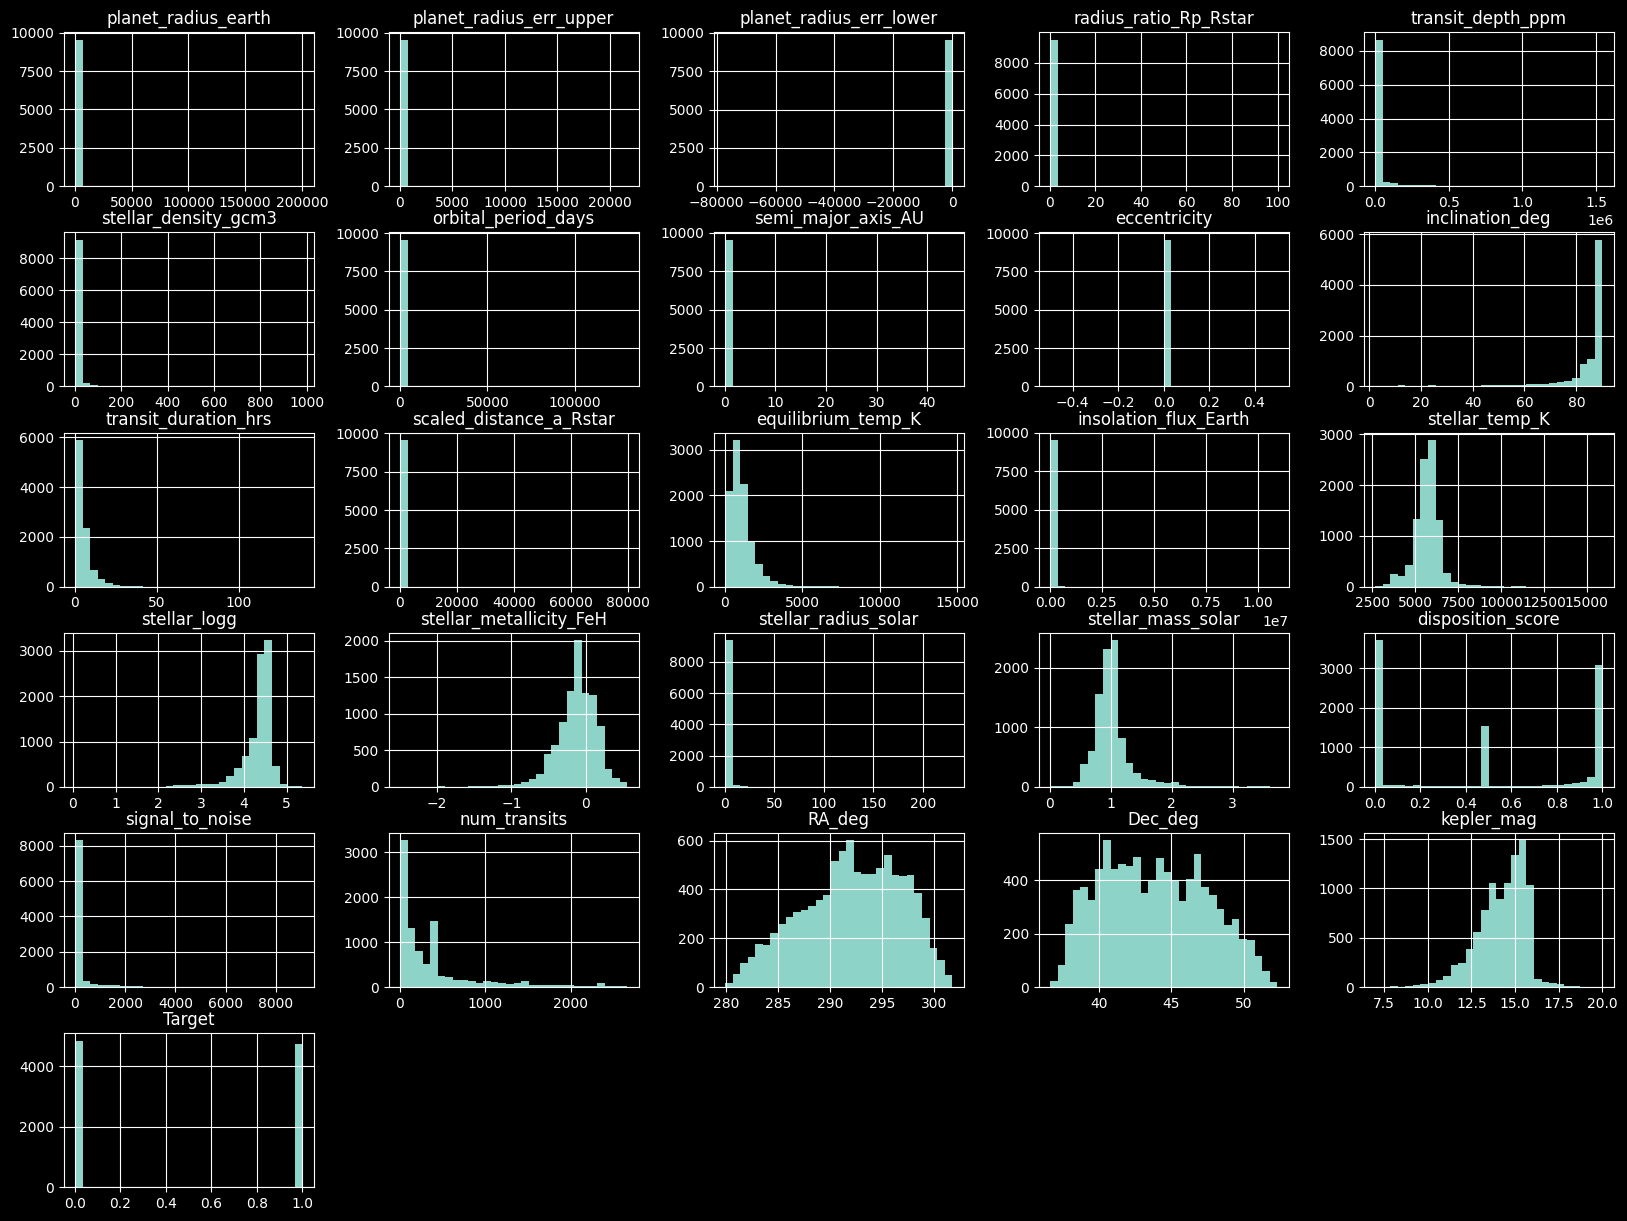

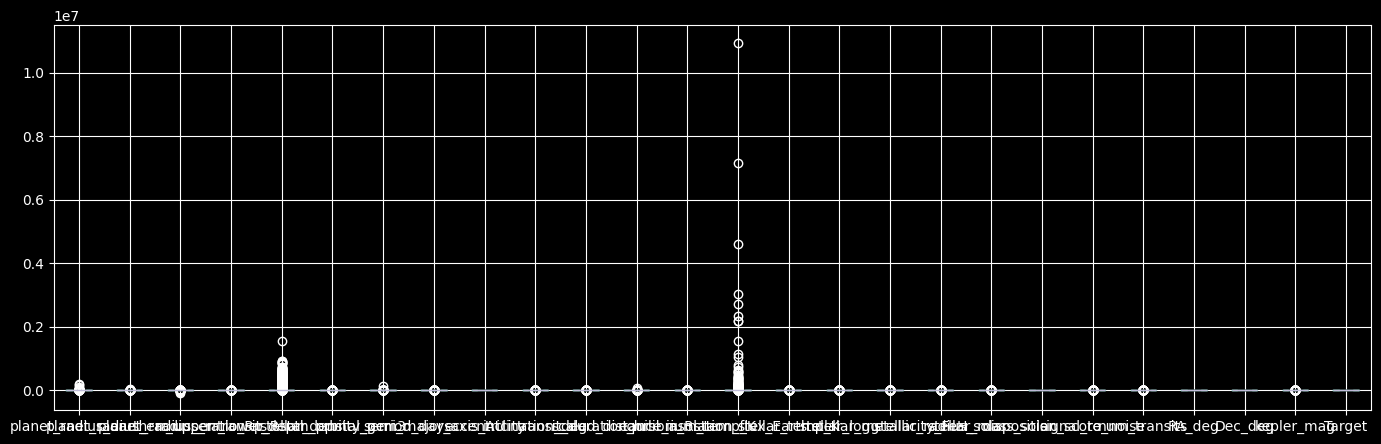

In [33]:
df0.boxplot(figsize=(17,5))
plt.show()

## 🔍 Exploratory Data Analysis (EDA)
Summarize the dataset and visualize distributions.

In [13]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   planet_radius_earth      9564 non-null   float64
 1   planet_radius_err_upper  9564 non-null   float64
 2   planet_radius_err_lower  9564 non-null   float64
 3   radius_ratio_Rp_Rstar    9564 non-null   float64
 4   transit_depth_ppm        9564 non-null   float64
 5   stellar_density_gcm3     9564 non-null   float64
 6   orbital_period_days      9564 non-null   float64
 7   semi_major_axis_AU       9564 non-null   float64
 8   eccentricity             9564 non-null   float64
 9   inclination_deg          9564 non-null   float64
 10  transit_duration_hrs     9564 non-null   float64
 11  scaled_distance_a_Rstar  9564 non-null   float64
 12  equilibrium_temp_K       9564 non-null   float64
 13  insolation_flux_Earth    9564 non-null   float64
 14  stellar_temp_K          

In [14]:
df0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
planet_radius_earth,9564.0,102.891778,3018.662296,0.080000,1.430000,2.490000,21.712500,2.003460e+05
planet_radius_err_upper,9564.0,17.657684,383.643110,0.000000,0.240000,0.550000,3.560000,2.164000e+04
planet_radius_err_lower,9564.0,-33.043077,1171.325558,-77200.000000,-2.480000,-0.320000,-0.140000,0.000000e+00
radius_ratio_Rp_Rstar,9564.0,0.283646,3.243195,0.001289,0.012576,0.022003,0.165193,9.987065e+01
transit_depth_ppm,9564.0,23791.335898,80666.665769,0.000000,166.800000,453.700000,2125.325000,1.541400e+06
stellar_density_gcm3,9564.0,9.164414,52.897176,0.000040,0.246265,1.040775,3.323948,9.808542e+02
orbital_period_days,9564.0,75.671358,1334.744046,0.241843,2.733684,9.752831,40.715178,1.299958e+05
semi_major_axis_AU,9564.0,0.223989,0.555506,0.005900,0.039300,0.090800,0.223989,4.498920e+01
eccentricity,9564.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
inclination_deg,9564.0,82.469147,14.931085,2.290000,82.469147,88.300000,89.740000,9.000000e+01


In [15]:
display(df0.columns.tolist())

['planet_radius_earth',
 'planet_radius_err_upper',
 'planet_radius_err_lower',
 'radius_ratio_Rp_Rstar',
 'transit_depth_ppm',
 'stellar_density_gcm3',
 'orbital_period_days',
 'semi_major_axis_AU',
 'eccentricity',
 'inclination_deg',
 'transit_duration_hrs',
 'scaled_distance_a_Rstar',
 'equilibrium_temp_K',
 'insolation_flux_Earth',
 'stellar_temp_K',
 'stellar_logg',
 'stellar_metallicity_FeH',
 'stellar_radius_solar',
 'stellar_mass_solar',
 'kepler_disposition',
 'disposition_score',
 'signal_to_noise',
 'num_transits',
 'RA_deg',
 'Dec_deg',
 'kepler_mag',
 'Target']

#### Outliers

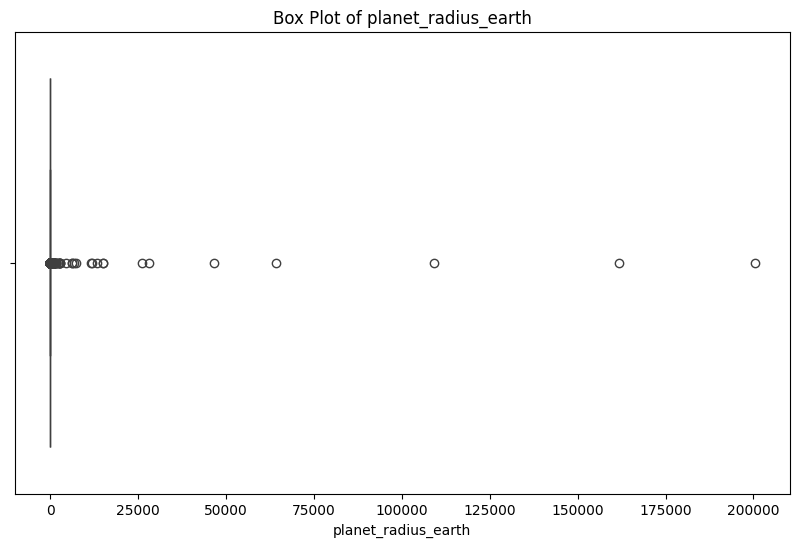

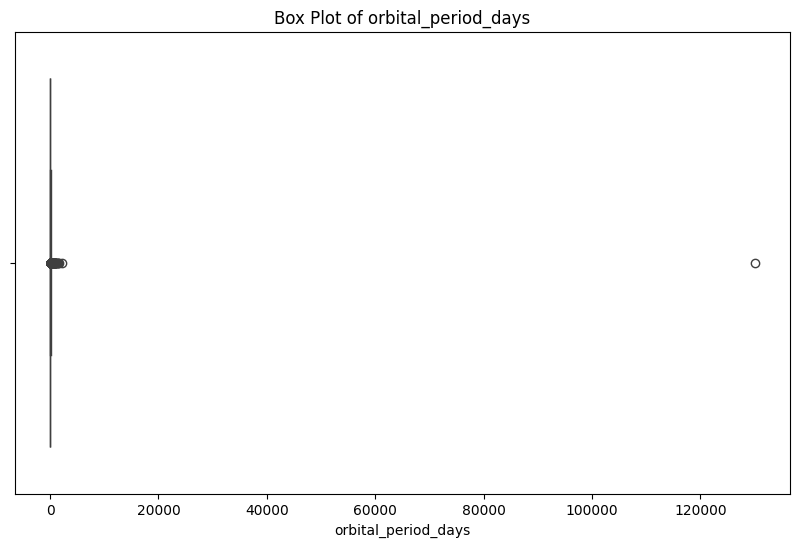

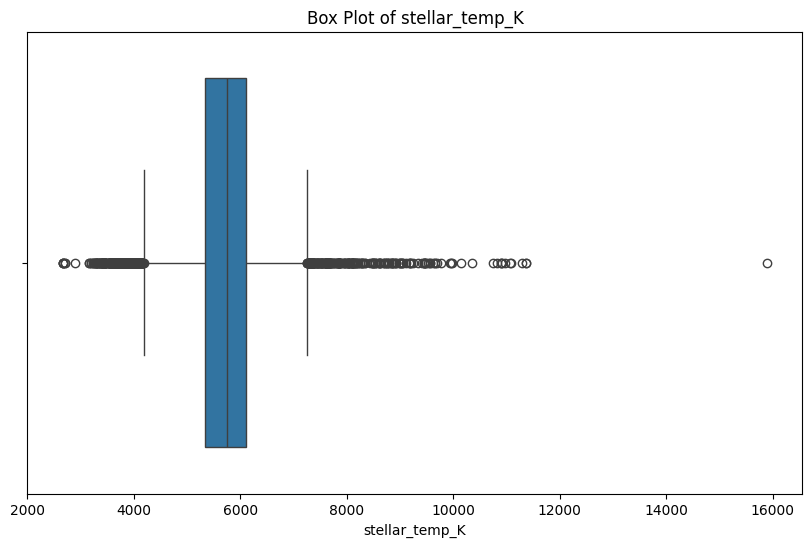

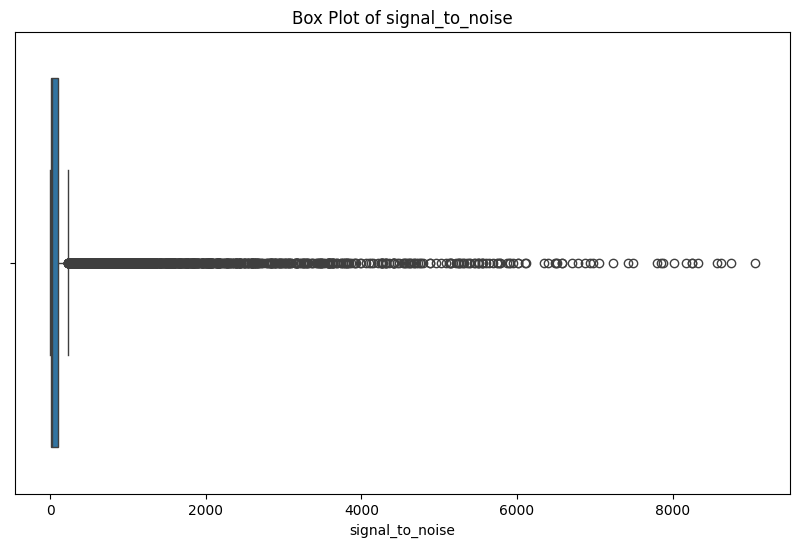

In [16]:
# Create box plots for a selection of numeric columns
numeric_cols_subset = ['planet_radius_earth', 'orbital_period_days', 'stellar_temp_K', 'signal_to_noise']

for col in numeric_cols_subset:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df0[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [17]:
for col in numeric_cols:
    Q1 = df0[col].quantile(0.25)
    Q3 = df0[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df0[(df0[col] < lower_bound) | (df0[col] > upper_bound)]

#### Splite


In [18]:
from sklearn.model_selection import train_test_split

# Assuming 'koi_disposition' is your target variable
X = df0.drop('Target', axis=1)
y = df0['Target']

# Split into training and the rest (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the rest into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (6694, 26)
Validation set shape: (1435, 26)
Test set shape: (1435, 26)


In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns from the training data
categorical_cols = X_train.select_dtypes(include='object').columns

# Create a ColumnTransformer to apply OneHotEncoder to categorical columns
# handle_unknown='ignore' is used to handle potential new categories in validation/test sets
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep the numeric columns
)

# Apply the preprocessing to the training, validation, and test sets
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print("Processed Training set shape:", X_train_processed.shape)
print("Processed Validation set shape:", X_val_processed.shape)
print("Processed Test set shape:", X_test_processed.shape)

Processed Training set shape: (6694, 27)
Processed Validation set shape: (1435, 27)
Processed Test set shape: (1435, 27)


In [20]:
from sklearn.preprocessing import StandardScaler

num_onehot_features = X_train_processed.shape[1] - len(numeric_cols)
numeric_feature_indices = slice(num_onehot_features, X_train_processed.shape[1])


scaler = StandardScaler(with_mean=False)

# Fit the scaler only on the training data and transform all sets
X_train_scaled_numeric = scaler.fit_transform(X_train_processed[:, numeric_feature_indices])
X_val_scaled_numeric = scaler.transform(X_val_processed[:, numeric_feature_indices])
X_test_scaled_numeric = scaler.transform(X_test_processed[:, numeric_feature_indices])

# Combine the scaled numeric features with the one-hot encoded categorical features
X_train_processed_scaled = np.hstack((X_train_processed[:, :num_onehot_features], X_train_scaled_numeric))
X_val_processed_scaled = np.hstack((X_val_processed[:, :num_onehot_features], X_val_scaled_numeric))
X_test_processed_scaled = np.hstack((X_test_processed[:, :num_onehot_features], X_test_scaled_numeric))

print("Scaled Processed Training set shape:", X_train_processed_scaled.shape)
print("Scaled Processed Validation set shape:", X_val_processed_scaled.shape)
print("Scaled Processed Test set shape:", X_test_processed_scaled.shape)

Scaled Processed Training set shape: (6694, 27)
Scaled Processed Validation set shape: (1435, 27)
Scaled Processed Test set shape: (1435, 27)


## 🤖 Modeling
Train and evaluate models.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_processed_scaled, y_train)

# Make predictions on the validation set
y_val_pred = random_forest_model.predict(X_val_processed_scaled)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

# Print classification report for more detailed metrics
print('Classification Report (Validation Set):')
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 1.0000
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       716
           1       1.00      1.00      1.00       719

    accuracy                           1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435



In [25]:
# Make predictions on the test set using the trained Random Forest model
y_test_pred_rf = random_forest_model.predict(X_test_processed_scaled)

# Evaluate the Random Forest model on the test set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print(f'Test Accuracy (Random Forest): {accuracy_test_rf:.4f}')

# Print classification report for more detailed metrics
print('Classification Report (Test Set - Random Forest):')
print(classification_report(y_test, y_test_pred_rf))

Test Accuracy (Random Forest): 0.9986
Classification Report (Test Set - Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       705
           1       1.00      1.00      1.00       730

    accuracy                           1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435



In [22]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the XGBoost model
# Using the objective 'binary:logistic' for binary classification
# Using use_label_encoder=False and eval_metric for newer versions of xgboost
xgboost_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train_processed_scaled, y_train)

# Make predictions on the validation set
y_val_pred_xgb = xgboost_model.predict(X_val_processed_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
print(f'Validation Accuracy (XGBoost): {accuracy_xgb:.4f}')

# Print classification report for more detailed metrics
print('Classification Report (Validation Set - XGBoost):')
print(classification_report(y_val, y_val_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:25:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Accuracy (XGBoost): 1.0000
Classification Report (Validation Set - XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       716
           1       1.00      1.00      1.00       719

    accuracy                           1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435



In [26]:
# Make predictions on the test set using the trained XGBoost model
y_test_pred_xgb = xgboost_model.predict(X_test_processed_scaled)

# Evaluate the XGBoost model on the test set
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f'Test Accuracy (XGBoost): {accuracy_test_xgb:.4f}')

# Print classification report for more detailed metrics
print('Classification Report (Test Set - XGBoost):')
print(classification_report(y_test, y_test_pred_xgb))

Test Accuracy (XGBoost): 0.9986
Classification Report (Test Set - XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       705
           1       1.00      1.00      1.00       730

    accuracy                           1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435



In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Voting Classifier
# 'soft' voting uses predicted probabilities
voting_clf = VotingClassifier(
    estimators=[('rf', random_forest_model), ('xgb', xgboost_model)],
    voting='soft'  # Use 'soft' voting if models support predict_proba
)

# Train the Voting Classifier
# The VotingClassifier will internally call fit on each estimator
voting_clf.fit(X_train_processed_scaled, y_train)

# Make predictions on the validation set
y_val_pred_ensemble = voting_clf.predict(X_val_processed_scaled)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_val, y_val_pred_ensemble)
print(f'Validation Accuracy (Ensemble - Voting Classifier): {accuracy_ensemble:.4f}')

# Print classification report for more detailed metrics
print('Classification Report (Validation Set - Ensemble):')
print(classification_report(y_val, y_val_pred_ensemble))

Validation Accuracy (Ensemble - Voting Classifier): 1.0000
Classification Report (Validation Set - Ensemble):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       716
           1       1.00      1.00      1.00       719

    accuracy                           1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:25:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [27]:
# Make predictions on the test set using the trained Ensemble model
y_test_pred_ensemble = voting_clf.predict(X_test_processed_scaled)

# Evaluate the Ensemble model on the test set
accuracy_test_ensemble = accuracy_score(y_test, y_test_pred_ensemble)
print(f'Test Accuracy (Ensemble - Voting Classifier): {accuracy_test_ensemble:.4f}')

# Print classification report for more detailed metrics
print('Classification Report (Test Set - Ensemble):')
print(classification_report(y_test, y_test_pred_ensemble))

Test Accuracy (Ensemble - Voting Classifier): 0.9986
Classification Report (Test Set - Ensemble):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       705
           1       1.00      1.00      1.00       730

    accuracy                           1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435



## 📊 Model Comparison
Compare results across models.

Top 10 Feature Importances:


,Feature,Importance
1,kepler_disposition_FALSE POSITIVE,0.365321
0,kepler_disposition_CANDIDATE,0.339480
21,disposition_score,0.160574
5,radius_ratio_Rp_Rstar,0.022720
2,planet_radius_earth,0.022205
11,inclination_deg,0.013708
4,planet_radius_err_lower,0.013311
13,scaled_distance_a_Rstar,0.012291
3,planet_radius_err_upper,0.008562
9,semi_major_axis_AU,0.006623


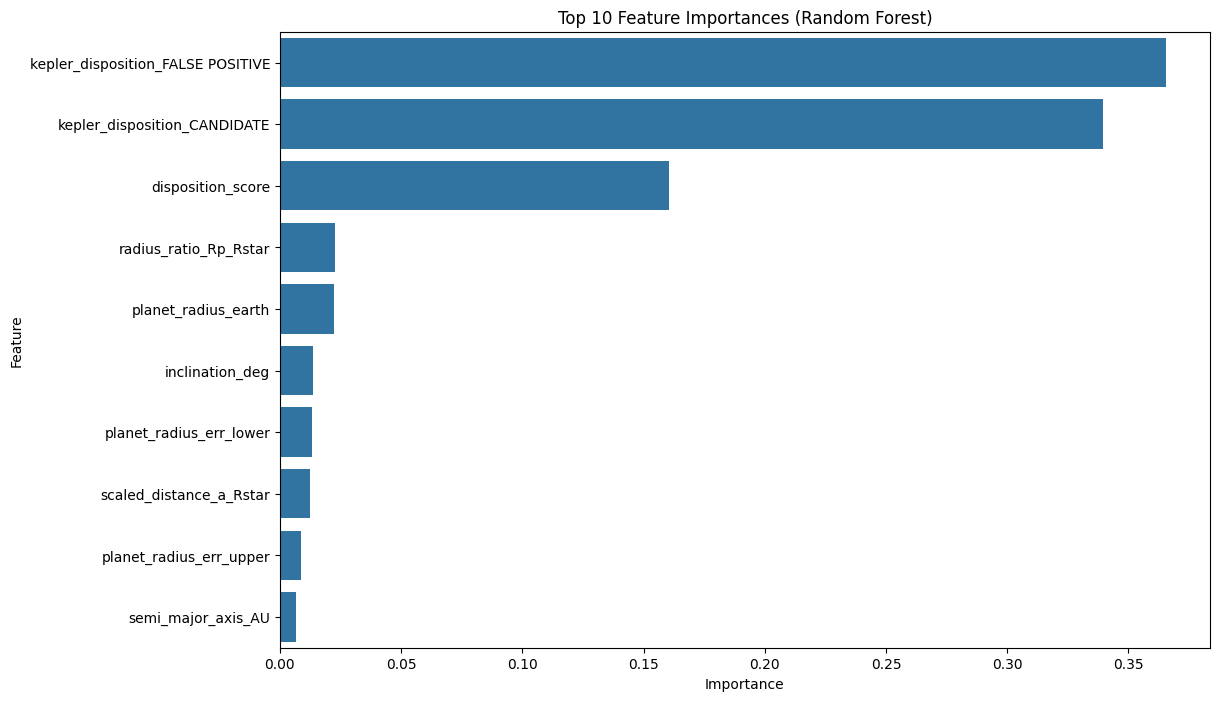

In [28]:
feature_importances = random_forest_model.feature_importances_

onehot_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_cols)
numeric_feature_names = X_train.select_dtypes(include=np.number).columns.tolist()
all_feature_names = list(onehot_feature_names) + numeric_feature_names

feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances:")
display(feature_importance_df.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## ✅ Summary & Next Steps
Key findings, insights, and recommendations.

- Main insights:
- Model performance:
- Next steps: